**Table of contents**<a id='toc0_'></a>    
- [dataset merge function](#toc1_1_1_)    
    - [Combinining Dataset](#toc1_1_2_)    
  - [cleaning up dateset](#toc1_2_)    
    - [Sort and inverse DataFrame](#toc1_2_1_)    
    - [Plot values](#toc1_2_2_)    
    - [Drop index/periodDateUTC value](#toc1_2_3_)    
    - [check the correlation between features and unemployment](#toc1_2_4_)    
    - [check for correlation between all features](#toc1_2_5_)    
      - [find most correlted feature](#toc1_2_5_1_)    
      - [Variance Inflation Factor (VIF)](#toc1_2_5_2_)    
    - [Feature Selection](#toc1_2_6_)    
      - [Combine Feature which are highly correlated with each other from above figure](#toc1_2_6_1_)    
    - [Spliting data](#toc1_2_7_)    
    - [Linear Regression](#toc1_2_8_)    
    - [Multivariate Normality and Homoscedasticity](#toc1_2_9_)    
    - [r2 score and mean squared error](#toc1_2_10_)    
    - [Linear Regression - Univeriant](#toc1_2_11_)    
    - [SVR (Support Vector Regression)](#toc1_2_12_)    
    - [Random Forest Regression:](#toc1_2_13_)    
    - [Confusion Matrix](#toc1_2_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [726]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error

### <a id='toc1_1_1_'></a>[dataset merge function](#toc0_)

In [727]:
def getMergedDf(final_df, df, name):
    partial_df = df[['periodDateUtc', 'actual']]
    partial_df.rename(columns={'actual': name}, inplace=True)

    # Convert to datetime
    final_df['periodDateUtc'] = pd.to_datetime(final_df['periodDateUtc'], utc=True)
    partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)

    # # Get only year and month
    # final_df['periodDateUtc'] = final_df['periodDateUtc'].dt.strftime('%Y-%m-%d')
    # partial_df['periodDateUtc'] = partial_df['periodDateUtc'].dt.strftime('%Y-%m-%d')

    # # Drop duplicates in partial_df based on 'periodDateUtc' column
    # final_df.drop_duplicates(subset='periodDateUtc', keep='first', inplace=True)

    # # Perform the merge, avoiding duplicate rows based on 'periodDateUtc'
    # merged_df = final_df.merge(partial_df, on='periodDateUtc', how='outer')

    # Calculate time-based features
    final_df['year'] = final_df['periodDateUtc'].dt.year
    final_df['month'] = final_df['periodDateUtc'].dt.month
    partial_df['year'] = partial_df['periodDateUtc'].dt.year
    partial_df['month'] = partial_df['periodDateUtc'].dt.month

    # Merge the two dataframes
    merged_df = final_df.merge(partial_df, on=['year', 'month'], how='inner')

    # # Calculate the time difference between consecutive periods
    # merged_df['time_diff_days_x'] = merged_df['periodDateUtc_x'].diff().dt.days
    # merged_df['time_diff_days_y'] = merged_df['periodDateUtc_y'].diff().dt.days

    # merged_df['time_diff_days'] = (merged_df['periodDateUtc_y'] - merged_df['periodDateUtc_x']).dt.days

    # Assign the 'periodDateUtc_y' values to 'periodDateUtc' column
    merged_df['periodDateUtc'] = merged_df['periodDateUtc_y']

    # Drop unnecessary columns
    merged_df.drop(columns=['periodDateUtc_x', 'periodDateUtc_y', 'year', 'month'], inplace=True)


    merged_df.sort_values(by='periodDateUtc', inplace=True)
    # Reset the index if needed
    merged_df.reset_index(drop=True, inplace=True)

    return merged_df

### <a id='toc1_1_2_'></a>[Combinining Dataset](#toc0_)

In [728]:
# Read the JSON file into a pandas DataFrame
file_path = "./data/USD_Manufacturing_PMI.json"
ManufacturingPMI = pd.read_json(file_path)

file_path = "./data/USD_Unemployment_Rate.json"
UnemploymentRate = pd.read_json(file_path)

file_path = "./data/USD_Services_PMI.json"
ServicesPMI = pd.read_json(file_path)

file_path = "./data/USD - Industrial Production (MoM).json"
IndustrialProduction = pd.read_json(file_path)

file_path = "./data/USD - Average Hourly Earnings (MoM).json"
AverageHourlyEarnings = pd.read_json(file_path)

file_path = "./data/USD - Monthly Budget Statement.json"
MonthlyBudget = pd.read_json(file_path)

file_path = "./data/USD - OLTS Job Openings.json"
OLTSJobOpenings = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (MoM).json"
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (YoY).json"
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales (MoM).json"
RetailSales = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales Control Group.json"
RetailSalesControlGroup = pd.read_json(file_path)

file_path = "./data/USD - UoM 5-year Consumer Inflation Expectation.json"
ConsumerInflationExpectation = pd.read_json(file_path)

file_path = "./data/USD_ ISM_Manufacturing_Prices_Paid.json"
ManufacturingPricesPaid = pd.read_json(file_path)

file_path = "./data/USD_Composite_PMI.json"
CompositePMI = pd.read_json(file_path)

file_path = "./data/USD_Factory_Orders_MoM.json"
FactoryOrders = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_Employment_Index_ISM.json"
ManufacturingEmploymentIndex = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_New_Orders_Index_ISM.json"
ManufacturingNewOrdersIndex = pd.read_json(file_path)

file_path = "./data/USD_ISM_Manufacturing_PMI.json"
ISMManufacturing = pd.read_json(file_path)

file_path = "./data/USD - Interest Rate.json"
InterestRate = pd.read_json(file_path)

file_path = "./data/USD - Initial Jobless Claims.json"
InitialJoblessClaims = pd.read_json(file_path)

file_path = "./data/USD - Building Permits.json"
BuildingPermits = pd.read_json(file_path)

file_path = "./data/USD - Challenger Job Cuts.json"
JobCuts = pd.read_json(file_path)

file_path = "./data/USD - Core Personal Consumption Expenditures.json"
PersonalConsumption = pd.read_json(file_path)

file_path = "./data/USD - Gross Domestic Product Price.json"
DomesticProductPrice = pd.read_json(file_path)

file_path = "./data/USD - ISM Services PMI.json"
ISMServicesPMI = pd.read_json(file_path)


final_df = pd.DataFrame()

final_df["periodDateUtc"] = UnemploymentRate["periodDateUtc"]
final_df["unemployment"] = UnemploymentRate["actual"]

#comnine datasets
final_df = getMergedDf(final_df, InitialJoblessClaims, "InitialJoblessClaims")
final_df = getMergedDf(final_df, IndustrialProduction, "IndustrialProduction")
final_df = getMergedDf(final_df, AverageHourlyEarnings, "AverageHourlyEarnings")
final_df = getMergedDf(final_df, RetailSales, "RetailSales")
final_df = getMergedDf(final_df, ManufacturingNewOrdersIndex, "ManufacturingNewOrdersIndex")
final_df = getMergedDf(final_df, ISMManufacturing, "ISMManufacturing")

#clean interest rate and convert
InterestRate.drop('periodDateUtc', axis=1)
InterestRate['dateUtc'] = pd.to_datetime(InterestRate['dateUtc'], utc=True)
InterestRate['periodDateUtc'] = pd.to_datetime(InterestRate['dateUtc'].dt.strftime('%Y-%m-01'))
final_df = getMergedDf(final_df, InterestRate, "InterestRate")

final_df = getMergedDf(final_df, FactoryOrders, "FactoryOrders")
final_df = getMergedDf(final_df, DomesticProductPrice, "DomesticProductPrice")
final_df = getMergedDf(final_df, ISMServicesPMI, "ISMServicesPMI")
final_df = getMergedDf(final_df, MonthlyBudget, "MonthlyBudget")
final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyMoM, "ProducerPriceIndex_FoodEnergyMoM")
final_df = getMergedDf(final_df, PersonalConsumption, "PersonalConsumption")

# final_df = getMergedDf(final_df, ManufacturingPMI, "ManufacturingPMI")
# final_df = getMergedDf(final_df, ServicesPMI, "ServicesPMI")
# final_df = getMergedDf(final_df, ManufacturingPricesPaid, "ManufacturingPricesPaid")
# final_df = getMergedDf(final_df, CompositePMI, "CompositePMI")
# final_df = getMergedDf(final_df, ManufacturingEmploymentIndex, "ManufacturingEmploymentIndex")
# final_df = getMergedDf(final_df, OLTSJobOpenings, "OLTSJobOpenings")
# final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyYoY, "ProducerPriceIndex_FoodEnergyYoY")
# final_df = getMergedDf(final_df, RetailSalesControlGroup, "RetailSalesControlGroup")
# final_df = getMergedDf(final_df, ConsumerInflationExpectation, "ConsumerInflationExpectation")
# final_df = getMergedDf(final_df, BuildingPermits, "BuildingPermits")
# final_df = getMergedDf(final_df, JobCuts, "JobCuts")

# print(UnemploymentRate[["periodDateUtc","actual"]])
# PersonalConsumption.sort_values(by='periodDateUtc', inplace=True)
print(ConsumerInflationExpectation[["periodDateUtc","actual"]])
print(BuildingPermits[["periodDateUtc","actual"]])

final_df.tail(20)

           periodDateUtc  actual
0   2023-07-01T00:00:00Z     3.1
1   2023-06-01T00:00:00Z     3.0
2   2023-06-01T00:00:00Z     3.0
3   2023-05-01T00:00:00Z     3.1
4   2023-05-01T00:00:00Z     3.2
..                   ...     ...
82  2020-02-01T00:00:00Z     2.3
83  2020-01-01T00:00:00Z     2.5
84  2020-01-01T00:00:00Z     2.5
85  2019-12-01T00:00:00Z     2.2
86  2019-12-01T00:00:00Z     2.3

[87 rows x 2 columns]
            periodDateUtc  actual
0    2023-07-01T00:00:00Z  23.697
1    2023-06-01T00:00:00Z  40.709
2    2023-05-01T00:00:00Z  80.089
3    2023-04-01T00:00:00Z  66.995
4    2023-03-01T00:00:00Z  89.703
..                    ...     ...
135  2012-04-01T00:00:00Z  40.559
136  2012-03-01T00:00:00Z  37.880
137  2012-02-01T00:00:00Z  51.728
138  2012-01-01T00:00:00Z  53.486
139  2011-12-01T00:00:00Z  41.785

[140 rows x 2 columns]


C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df.rename(columns={'actual': name}, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,unemployment,InitialJoblessClaims,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,FactoryOrders,DomesticProductPrice,ISMServicesPMI,MonthlyBudget,ProducerPriceIndex_FoodEnergyMoM,PersonalConsumption,periodDateUtc
2405,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.7,56.7,-211.0,0.2,1.4,2022-07-01 00:00:00+00:00
2406,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.7,56.7,-211.0,0.2,2.4,2022-07-01 00:00:00+00:00
2407,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,3.4,2022-07-01 00:00:00+00:00
2408,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,2.1,2022-07-01 00:00:00+00:00
2409,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,1.6,2022-07-01 00:00:00+00:00
2410,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,1.3,2022-07-01 00:00:00+00:00
2411,3.5,235,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.0,56.7,-211.0,0.2,1.6,2022-07-01 00:00:00+00:00
2412,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,1.7,2022-07-01 00:00:00+00:00
2413,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,1.4,2022-07-01 00:00:00+00:00
2414,3.5,251,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,2.4,2022-07-01 00:00:00+00:00


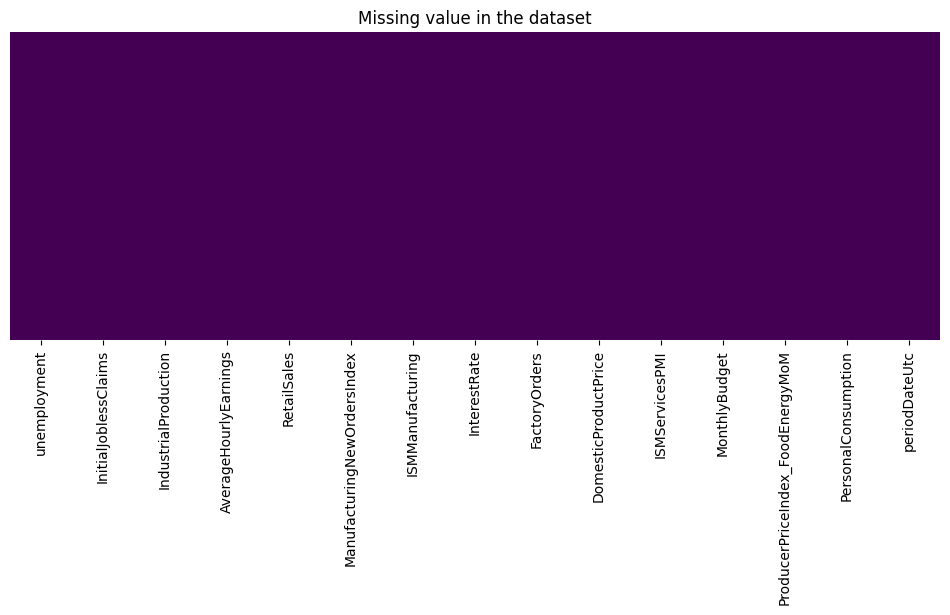

In [729]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

## <a id='toc1_2_'></a>[cleaning up dateset](#toc0_)

In [730]:
#remove data i fperiodDataUTC is null
final_df = final_df.dropna(subset=['periodDateUtc']);

#first fill previous value if there is not a previous value fill 0
for column in final_df.columns:
    final_df[column].fillna(method="ffill", inplace=True)
    final_df[column].fillna(0, inplace=True)
    
print(final_df.head(10))

   unemployment  InitialJoblessClaims  IndustrialProduction  \
0           4.9                   322                   0.1   
1           4.9                   306                   0.1   
2           4.9                   306                   0.1   
3           4.9                   378                   0.1   
4           4.9                   378                   0.1   
5           4.9                   306                   0.1   
6           4.9                   306                   0.1   
7           4.9                   306                   0.1   
8           4.9                   306                   0.1   
9           4.9                   306                   0.1   

   AverageHourlyEarnings  RetailSales  ManufacturingNewOrdersIndex  \
0                    0.2          0.4                         50.7   
1                    0.2          0.4                         50.7   
2                    0.2          0.4                         50.7   
3                    0.2  

### <a id='toc1_2_1_'></a>[Sort and inverse DataFrame](#toc0_)

In [731]:
# Reverse the order of the DataFrame to make it descending
final_df = final_df.iloc[::-1]

# Sort the DataFrame by 'periodDateUtc' in ascending order
final_df.sort_values(by='periodDateUtc', inplace=True)

# Reset the index if needed
final_df.reset_index(drop=True, inplace=True)

final_df

,unemployment,InitialJoblessClaims,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,FactoryOrders,DomesticProductPrice,ISMServicesPMI,MonthlyBudget,ProducerPriceIndex_FoodEnergyMoM,PersonalConsumption,periodDateUtc
0,4.9,322,0.1,0.2,0.4,50.7,50.7,3.0,-2.3,3.5,44.6,17.8,0.4,0.9,2008-01-01 00:00:00+00:00
1,4.9,302,0.1,0.2,0.4,50.7,50.7,3.0,-2.3,3.5,44.6,17.8,0.4,0.9,2008-01-01 00:00:00+00:00
2,4.9,302,0.1,0.2,0.4,50.7,50.7,3.5,-2.3,3.5,44.6,17.8,0.4,1.0,2008-01-01 00:00:00+00:00
3,4.9,302,0.1,0.2,0.4,50.7,50.7,3.5,-2.3,3.5,44.6,17.8,0.4,0.9,2008-01-01 00:00:00+00:00
4,4.9,302,0.1,0.2,0.4,50.7,50.7,3.0,-2.3,3.5,44.6,17.8,0.4,1.0,2008-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,3.5,235,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.0,56.7,-211.0,0.2,1.7,2022-07-01 00:00:00+00:00
2421,3.5,244,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,4.1,56.7,-211.0,0.2,3.4,2022-07-01 00:00:00+00:00
2422,3.5,235,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.7,56.7,-211.0,0.2,2.4,2022-07-01 00:00:00+00:00
2423,3.5,256,0.6,0.5,0.0,52.8,52.8,2.5,-1.0,2.1,56.7,-211.0,0.2,1.4,2022-07-01 00:00:00+00:00


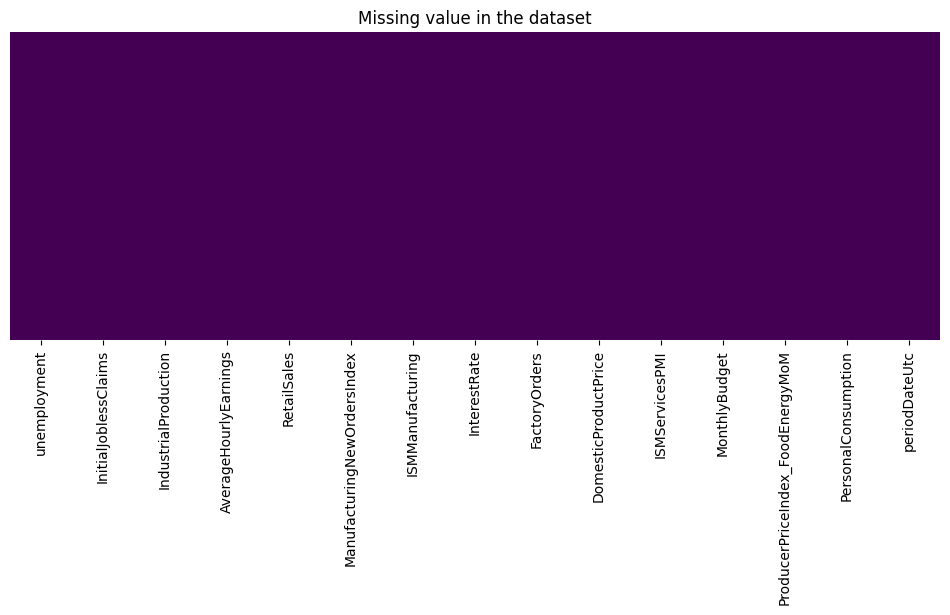

In [732]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


### <a id='toc1_2_2_'></a>[Plot values](#toc0_)

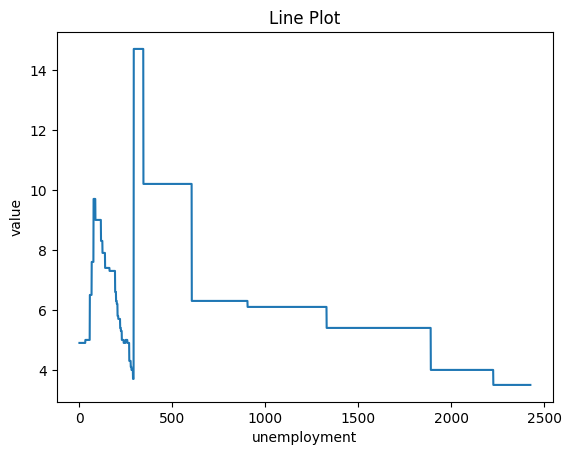

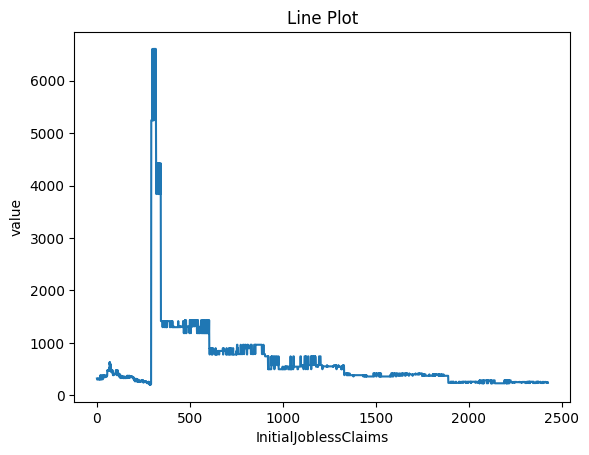

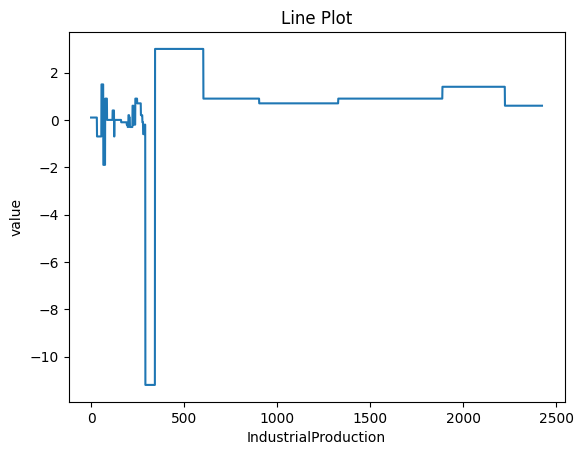

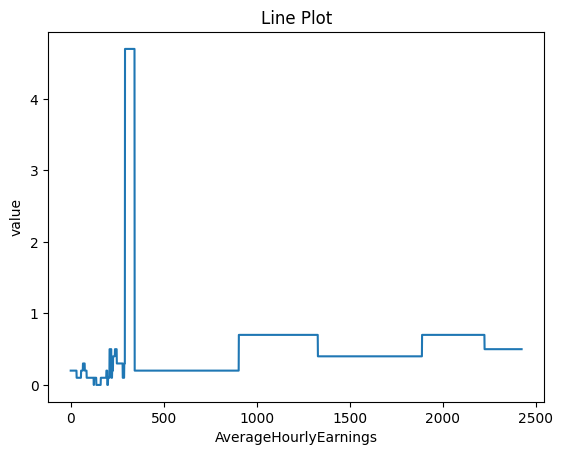

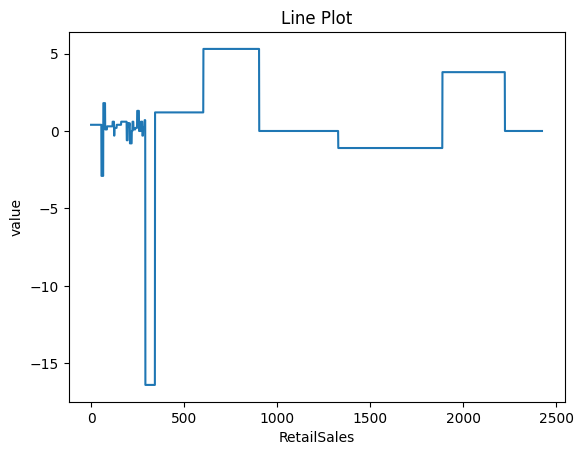

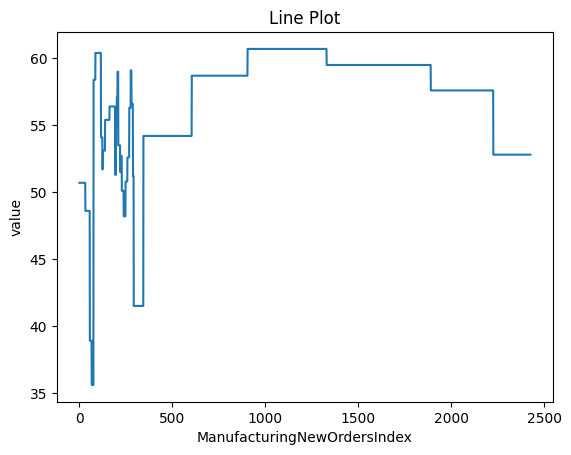

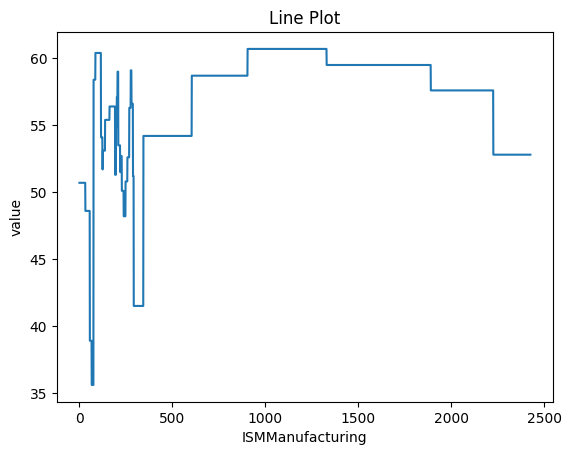

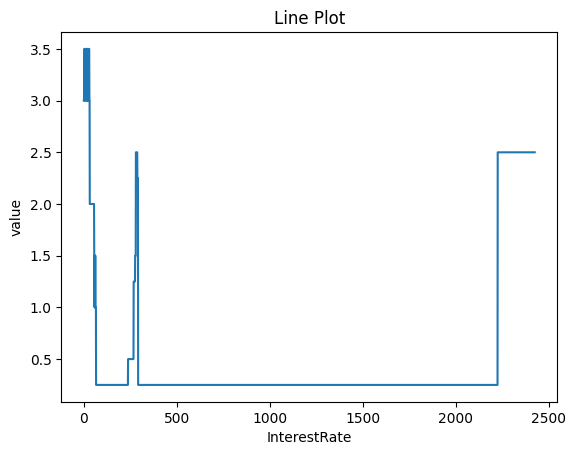

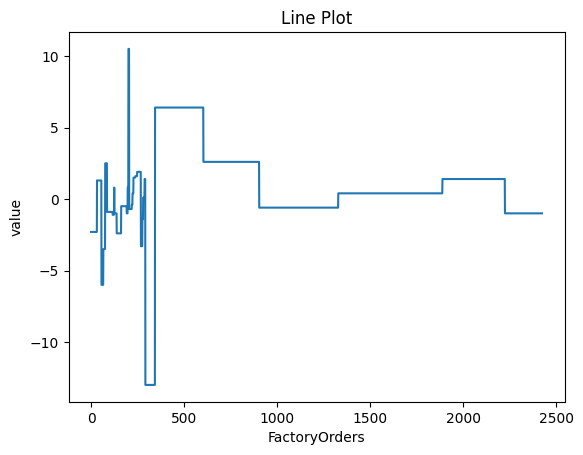

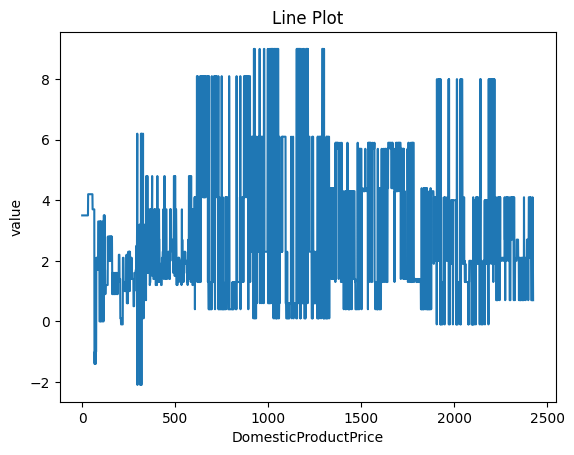

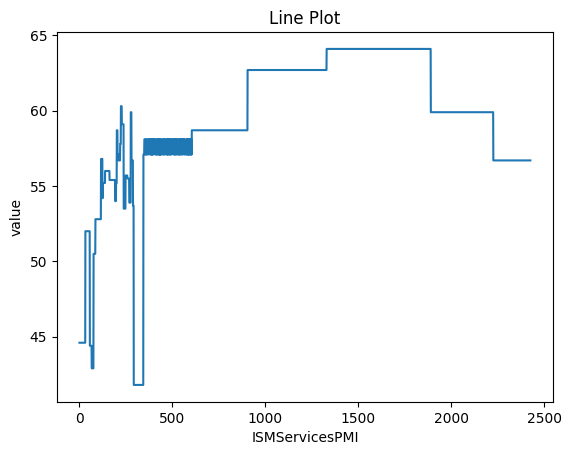

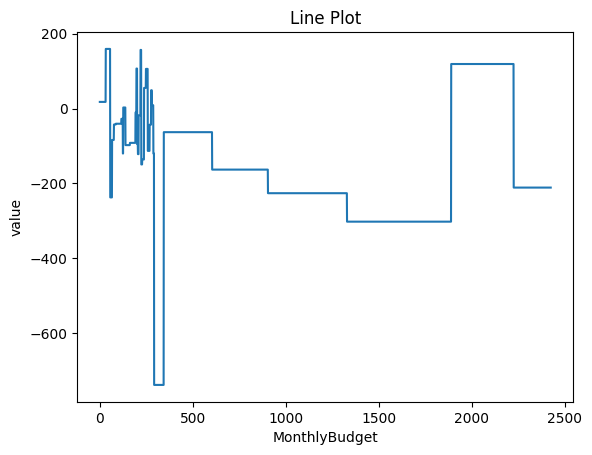

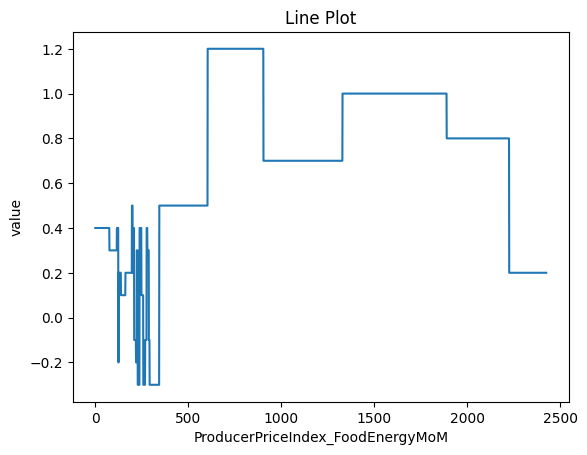

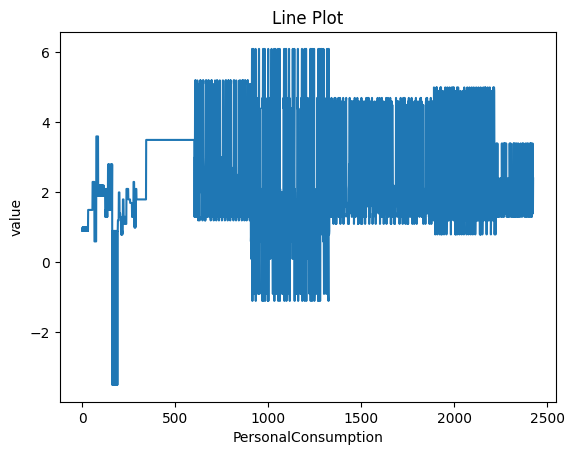

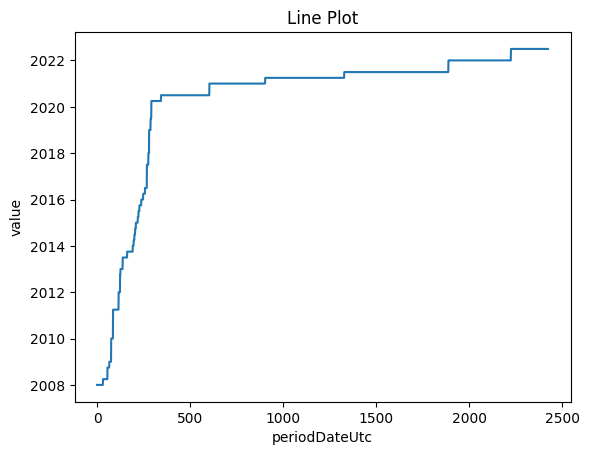

In [733]:

for column in final_df.columns:
    plt.plot(final_df.index, final_df[column], label=column)

    # plt.legend()
    # plt.tight_layout()  # Optional: Adjust the layout for better spacing
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.xlabel(column)
    plt.ylabel('value')
    plt.title('Line Plot')
    plt.show()

In [734]:
# from sklearn.ensemble import IsolationForest


# for column in final_df.columns:

#     plt.plot(final_df.index, final_df[column], c='red', label=column)

#     # Fit the IsolationForest model to detect outliers
#     outlier_detector = IsolationForest(contamination='auto', random_state=42)
#     outlier_detector.fit(final_df[[column]])

#     # Predict the outliers
#     final_df['is_outlier'] = outlier_detector.predict(final_df[[column]])

#     # Update the outlier values with a desired value (e.g., median)
#     median_value = final_df.loc[final_df['is_outlier'] == -1, column].median()
#     final_df.loc[final_df['is_outlier'] == -1, column] = median_value

#     # Remove the 'is_outlier' column since it's no longer needed
#     final_df.drop(columns='is_outlier', inplace=True)

#     plt.plot(final_df.index, final_df[column], c='blue', label=column+" updated")
#     plt.xlabel('Index')
#     plt.ylabel(column)
#     plt.title(column + ' with Outliers vs Updated')

#     plt.tight_layout()
#     plt.show()


### <a id='toc1_2_3_'></a>[Drop index/periodDateUTC value](#toc0_)

In [735]:
final_df = final_df.drop('periodDateUtc', axis=1)

### <a id='toc1_2_4_'></a>[check the correlation between features and unemployment](#toc0_)

The correlation coefficient ranges from -1 to 1:</br></br>

If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. </br>
If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. </br>
If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the two variables.</br>

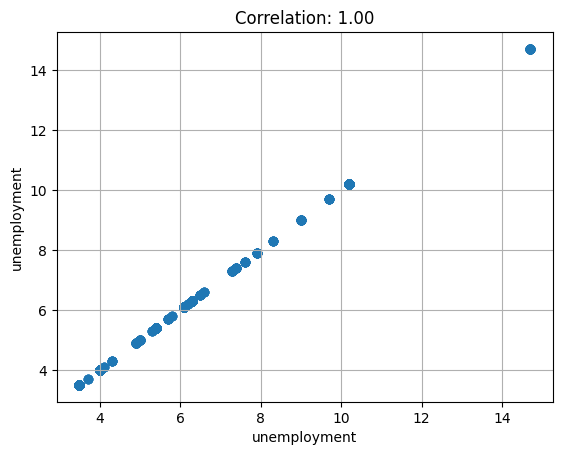

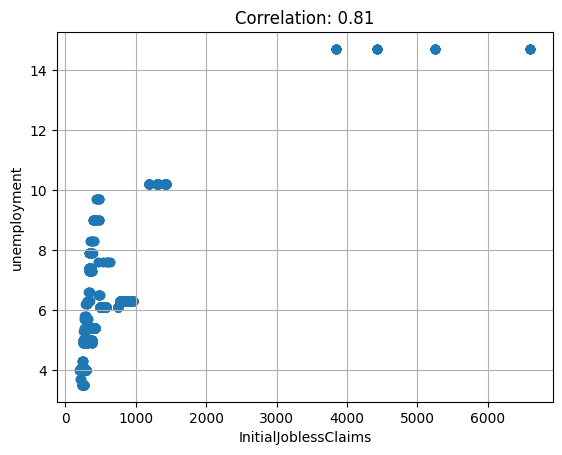

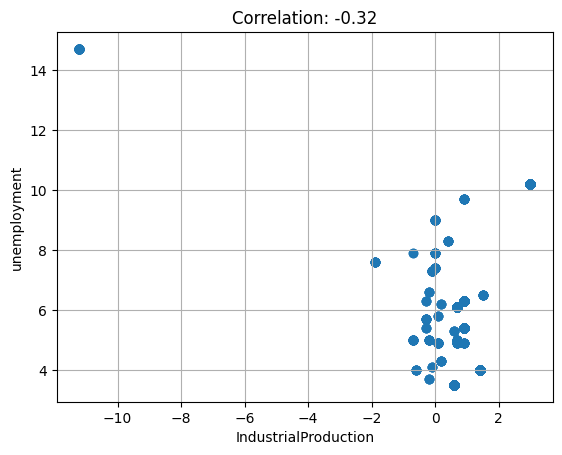

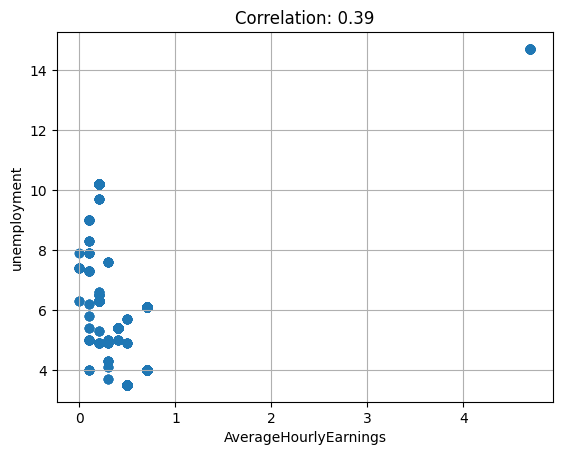

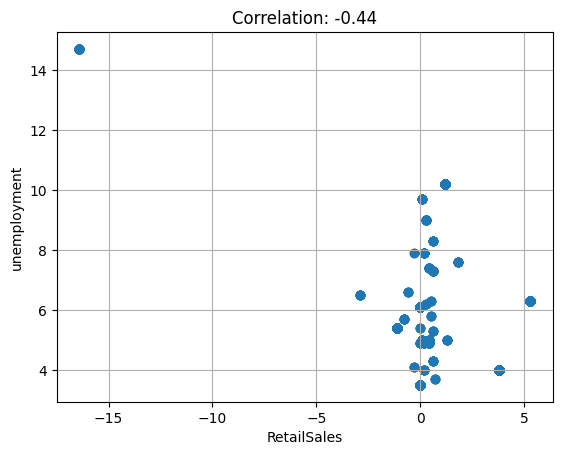

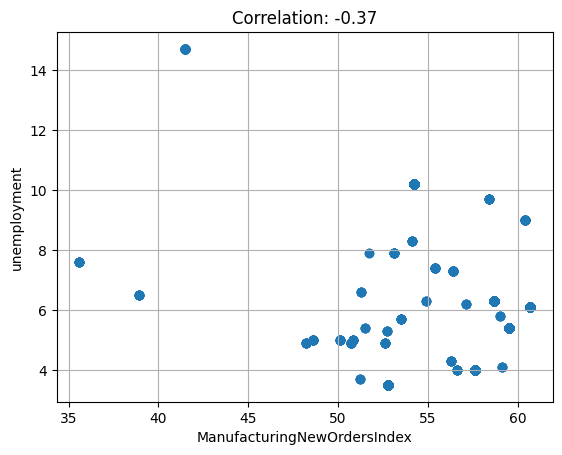

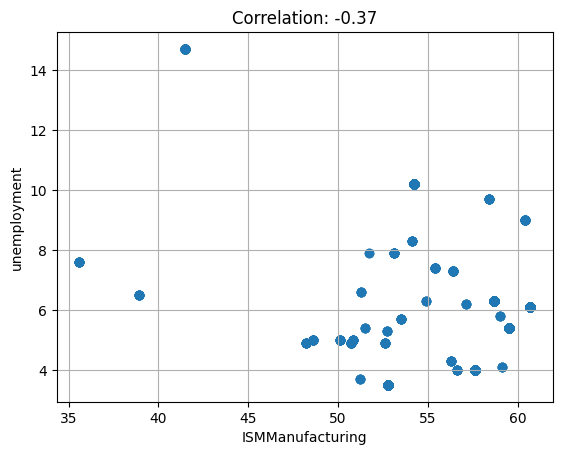

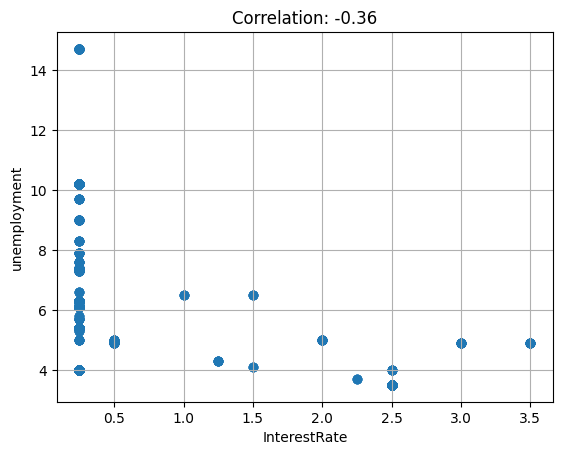

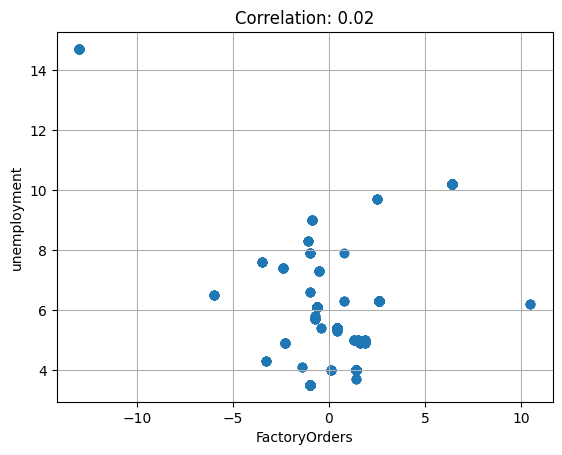

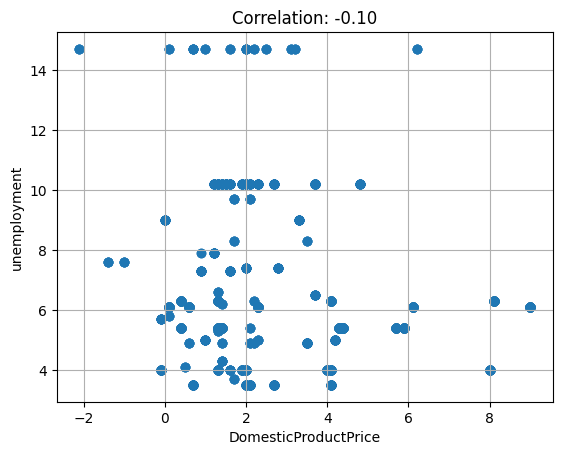

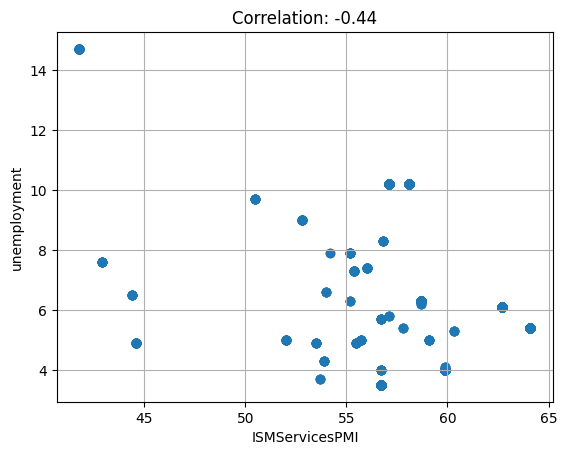

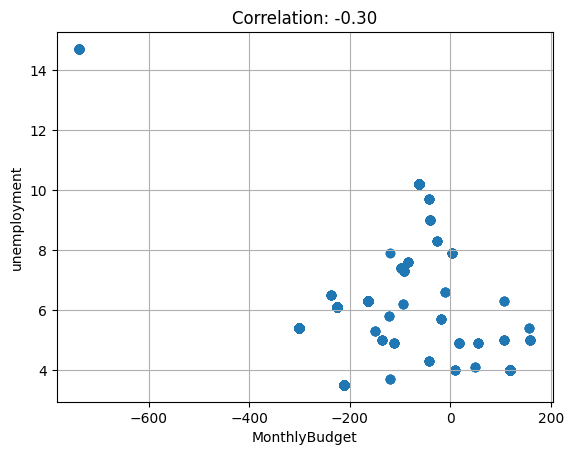

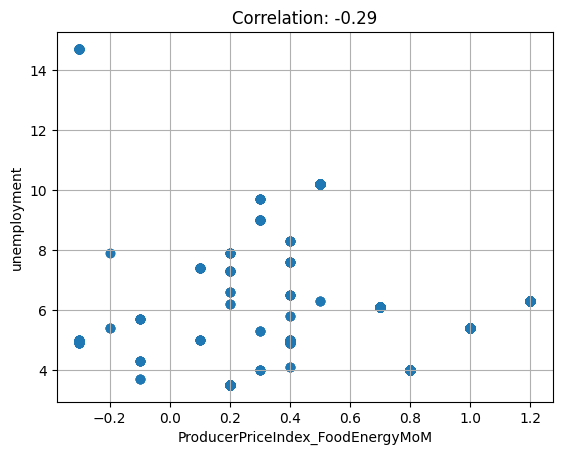

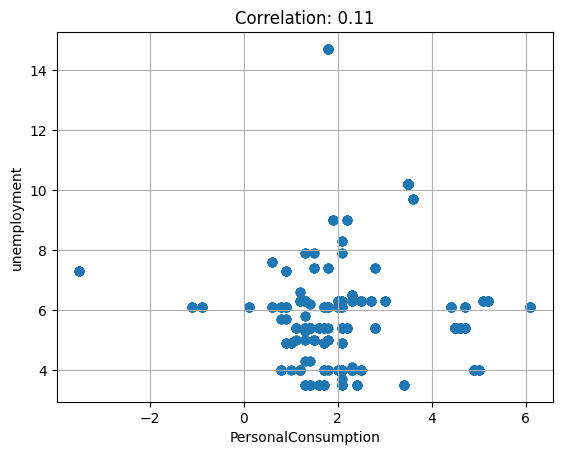

In [736]:
for column in final_df.columns:
    correlation = final_df[column].corr(final_df['unemployment'])

    # Plot a scatter plot to visualize the correlation
    plt.scatter(final_df[column], final_df['unemployment'])
    plt.xlabel(column)
    plt.ylabel('unemployment')
    plt.title(f'Correlation: {correlation:.2f}')
    plt.grid(True)
    plt.show()

### <a id='toc1_2_5_'></a>[check for correlation between all features](#toc0_)

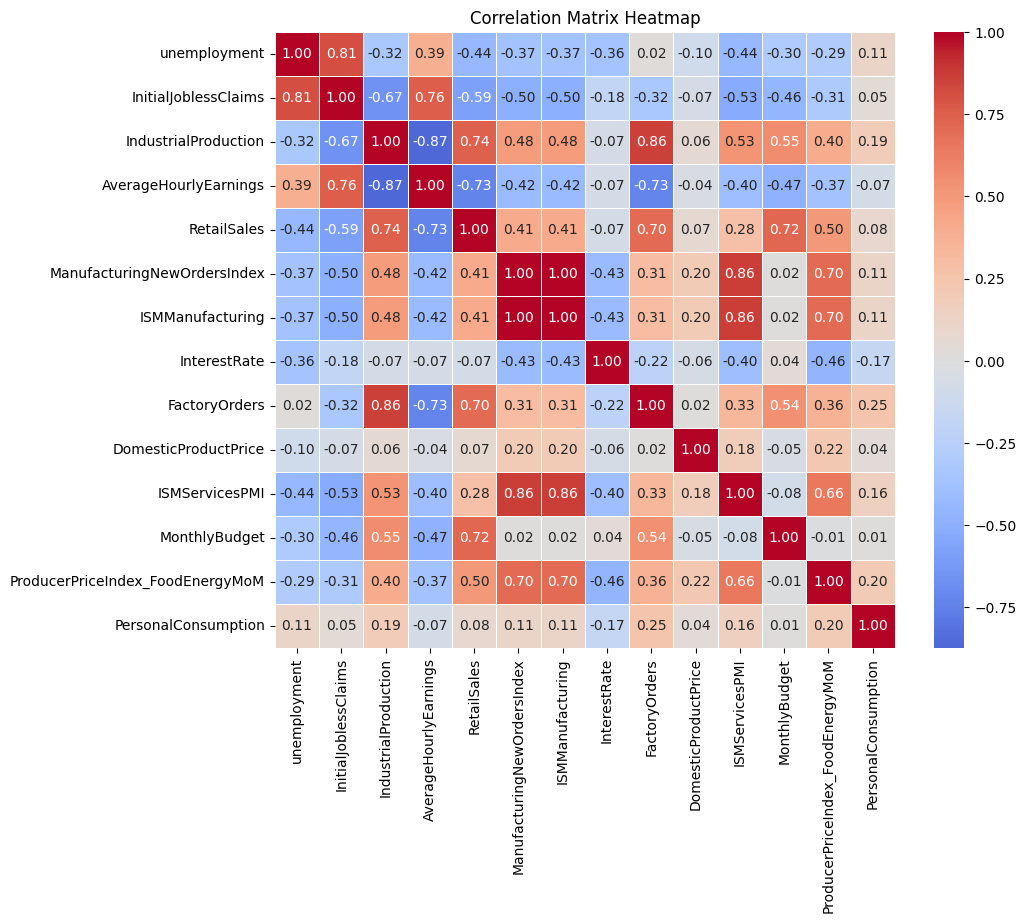

In [737]:
numeric_df = final_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### <a id='toc1_2_5_1_'></a>[find most correlted feature](#toc0_)

In [738]:
def getMulticollinearFeatures(df, threshold): 
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()

    # Select highly correlated features
    multicollinear_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                multicollinear_features.append(colname_i)
                multicollinear_features.append(colname_j)

    return multicollinear_features;

In [739]:
def plotMulticollinearFeatures(features):
    multicollinear_features = np.array(features)
    string_counts = Counter(multicollinear_features)

    sorted_string_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=False))
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_string_counts.keys(), sorted_string_counts.values())
    plt.xlabel('multicollinear features')
    plt.ylabel('Frequency')
    plt.title('Distribution of Strings by Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### <a id='toc1_2_5_2_'></a>[Variance Inflation Factor (VIF)](#toc0_)

<p>VIF is a metric that quantifies the extent of multicollinearity in a feature by measuring how much the variance of an estimated regression coefficient increases when that feature is added to the model. </br>
High VIF values (>5 or 10) suggest the presence of multicollinearity.</P>

In [740]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(df): 
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    numeric_df = df.select_dtypes(include='number')
    vif['Feature'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    print(vif)

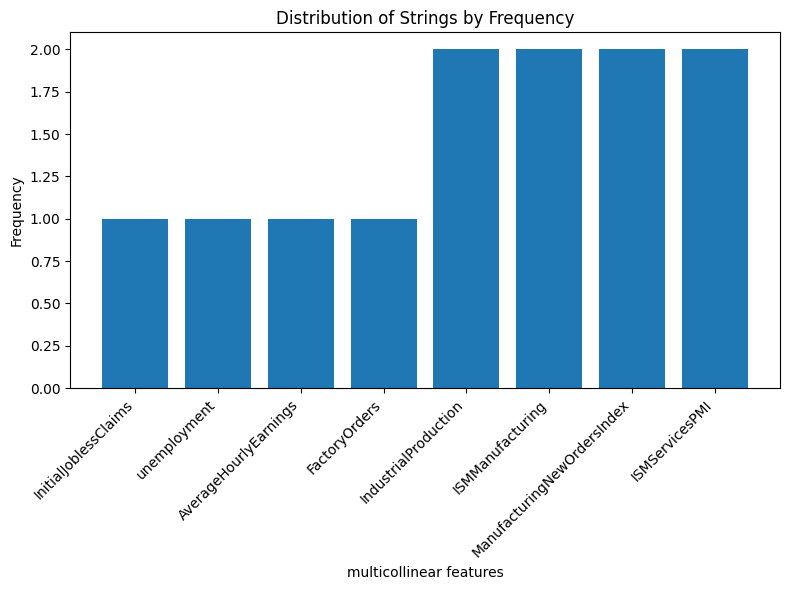

In [741]:
features = getMulticollinearFeatures(final_df, 0.8)
plotMulticollinearFeatures(features)


### <a id='toc1_2_6_'></a>[Feature Selection](#toc0_)

#### <a id='toc1_2_6_1_'></a>[Combine Feature which are highly correlated with each other from above figure](#toc0_)

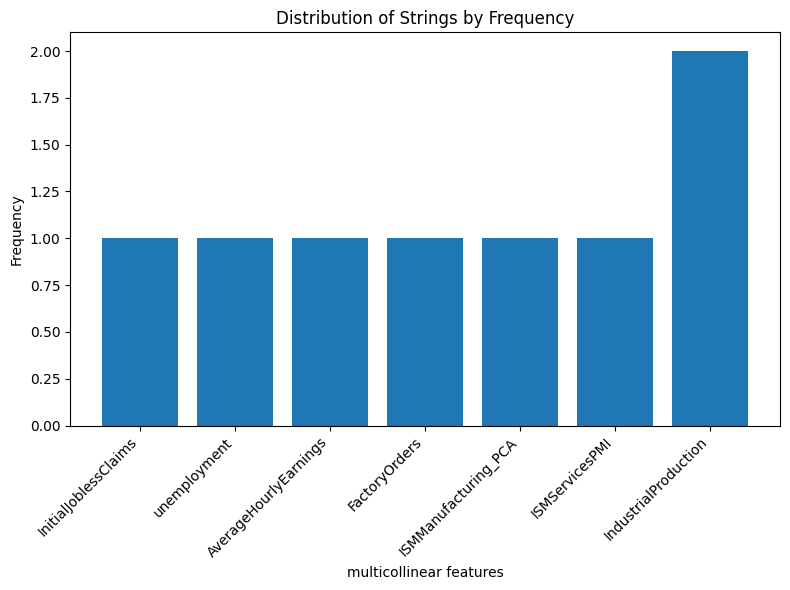

In [742]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

ManufacturingCols = ['ISMManufacturing', 'ManufacturingNewOrdersIndex']
#'ISMManufacturing', 'ManufacturingNewOrdersIndex', 'ManufacturingPricesPaid', 'ManufacturingEmploymentIndex',
X_std = scaler.fit_transform(final_df[ManufacturingCols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
final_df['ISMManufacturing_PCA'] = X_pca

cleaned_df = final_df.drop(ManufacturingCols,axis=1) # Independet variable

features = getMulticollinearFeatures(cleaned_df, 0.8)
plotMulticollinearFeatures(features)

In [743]:
getVIF(cleaned_df);

                             Feature        VIF
0                       unemployment  61.570482
1               InitialJoblessClaims  30.396128
2               IndustrialProduction  15.076295
3              AverageHourlyEarnings  20.891256
4                        RetailSales   8.075549
5                       InterestRate   4.010789
6                      FactoryOrders  10.567888
7               DomesticProductPrice   2.673724
8                     ISMServicesPMI  95.436875
9                      MonthlyBudget  10.212496
10  ProducerPriceIndex_FoodEnergyMoM  20.203600
11               PersonalConsumption   4.135531
12              ISMManufacturing_PCA   3.544919


In [744]:
print(cleaned_df.describe())

       unemployment  InitialJoblessClaims  IndustrialProduction  \
count   2425.000000           2425.000000           2425.000000   
mean       6.116371            645.129485              0.768701   
std        2.238539            745.643559              1.945229   
min        3.500000            199.000000            -11.200000   
25%        4.900000            286.000000              0.700000   
50%        5.400000            400.000000              0.900000   
75%        6.300000            779.000000              0.900000   
max       14.700000           6606.000000              3.000000   

       AverageHourlyEarnings  RetailSales  InterestRate  FactoryOrders  \
count            2425.000000  2425.000000   2425.000000    2425.000000   
mean                0.521938     0.736825      0.515773       0.763052   
std                 0.654198     3.348681      0.728928       3.065746   
min                 0.000000   -16.400000      0.250000     -13.000000   
25%                 0.2000

### <a id='toc1_2_7_'></a>[Spliting data](#toc0_)

In [745]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('InterestRate',axis=1) # Independet variable
y = cleaned_df['InterestRate'] # dependent variable

# # Initialize the SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE to create synthetic samples for the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [746]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [747]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

### <a id='toc1_2_8_'></a>[Linear Regression](#toc0_)

In [748]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,15.506733,15.506733
1,theta_1,unemployment,-0.466856,-0.466856
2,theta_2,InitialJoblessClaims,0.000459,0.000459
3,theta_3,IndustrialProduction,0.263218,0.263218
4,theta_4,AverageHourlyEarnings,-0.137123,-0.137123
5,theta_5,RetailSales,-0.100071,-0.100071
6,theta_6,FactoryOrders,0.096671,0.096671
7,theta_7,DomesticProductPrice,0.007920,0.007920
8,theta_8,ISMServicesPMI,-0.209758,-0.209758
9,theta_9,MonthlyBudget,-0.002795,-0.002795


In [749]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.08708678627154641
R square obtain for normal equation method is : 0.8154083485235972


In [750]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.08708678627154333
R square obtain for scikit learn library is : 0.8154083485236037


C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\3006966529.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


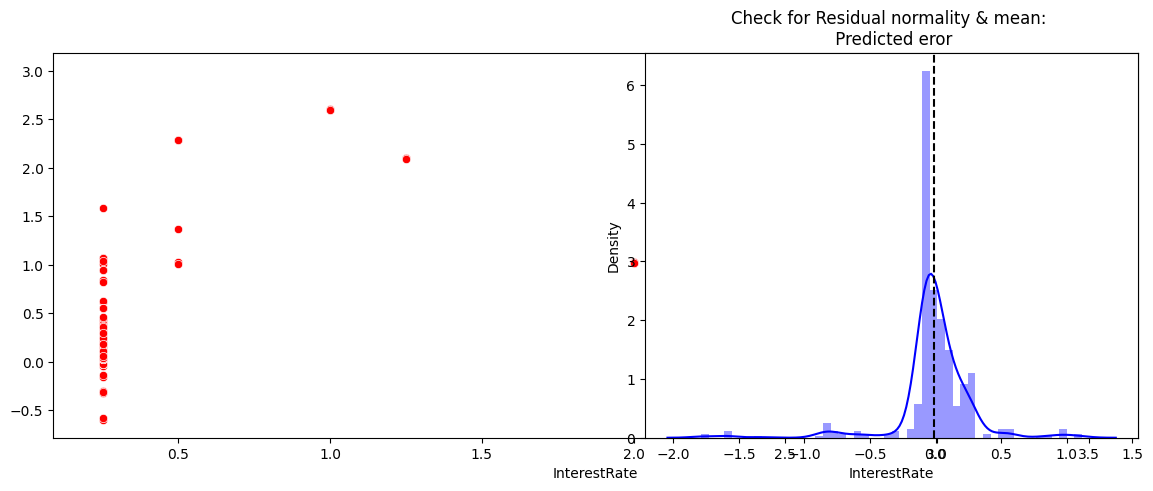

In [751]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


# ax.set_title('Check for Linearity:\n Unemployed Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Predicted eror');

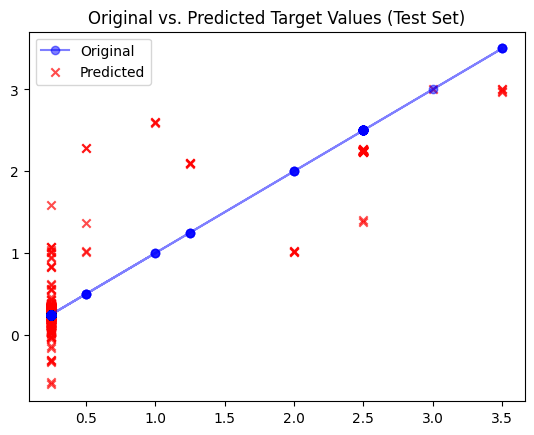

In [752]:
# Plot the original vs. predicted values for the test set
plt.plot(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred_sk, c='red', label='Predicted', marker='x', alpha=0.7)
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_9_'></a>[Multivariate Normality and Homoscedasticity](#toc0_)

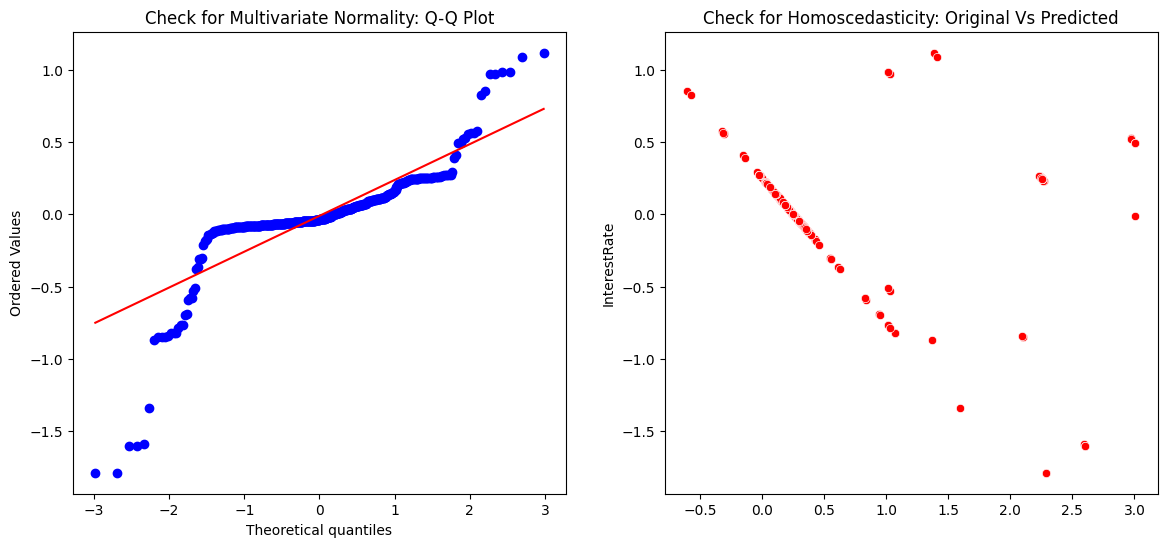

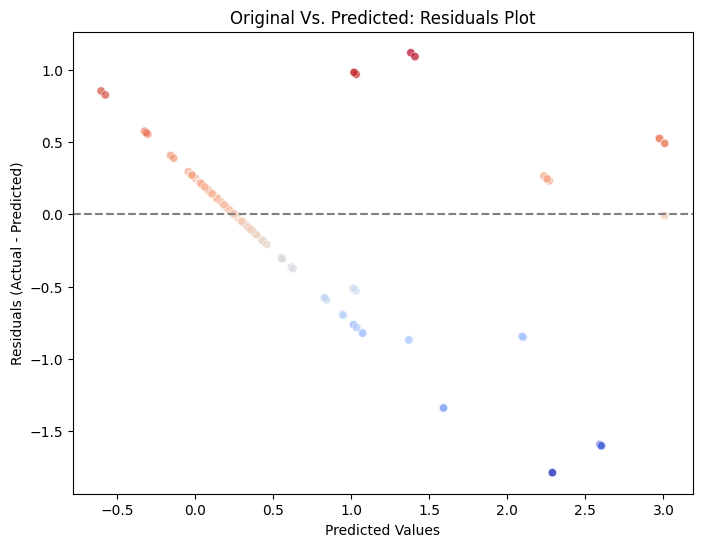

In [753]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: Q-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: Original Vs Predicted');

# Calculate the residuals
residuals = y_test - y_pred_sk

# Create the plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y=residuals, x=y_pred_sk, hue=residuals, palette='coolwarm', alpha=0.7)
plt.axhline(0, color='gray', linestyle='dashed')  # Add a dashed line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Original Vs. Predicted: Residuals Plot')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

In [754]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

5.417363093085873

### <a id='toc1_2_10_'></a>[r2 score and mean squared error](#toc0_)

In [755]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

residuals = abs((y_test - y_pred)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean)

R-squared: 0.8154083485236037
Mean Squared Error (MSE): 0.08708678627154333
Mean of Residuals / Accouracy : 0.4326179365369693


### <a id='toc1_2_11_'></a>[Linear Regression - Univeriant](#toc0_)

In [756]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

unemployment = final_df['unemployment']
uv_df = final_df.drop('unemployment',axis=1) # Independet variable
df_cols = uv_df.columns

X_std = scaler.fit_transform(final_df[df_cols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
univariant_df = pd.DataFrame()
univariant_df['target'] = unemployment
univariant_df['combined_feature'] = X_pca

# Step 5: Perform univariate linear regression to predict the 'target'
X = univariant_df['combined_feature'].values.reshape(-1, 1)
y = univariant_df['target'].values

In [757]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Perform univariate linear regression to predict the 'target'
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 7: Calculate the cost function (mean squared error) for the model's predictions on the test set.
predictions = regressor.predict(X_test)
cost_function = mean_squared_error(y_test, predictions)

print("Cost function (Mean Squared Error) on the test set:", cost_function)

Cost function (Mean Squared Error) on the test set: 4.053336536548043


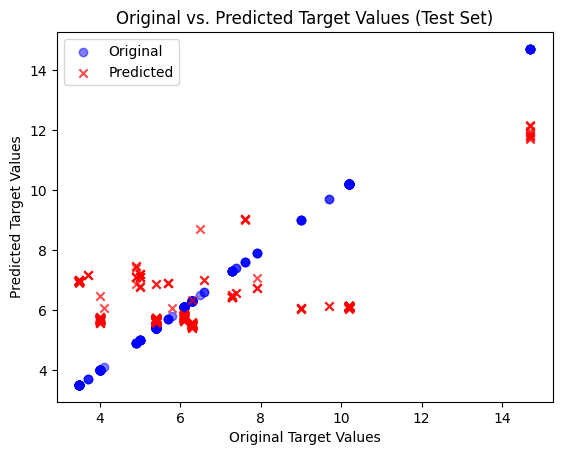

Mean of Residuals / Accouracy : 25.182134067199296
Standard Deviation of Residuals: 0.2638900349753342


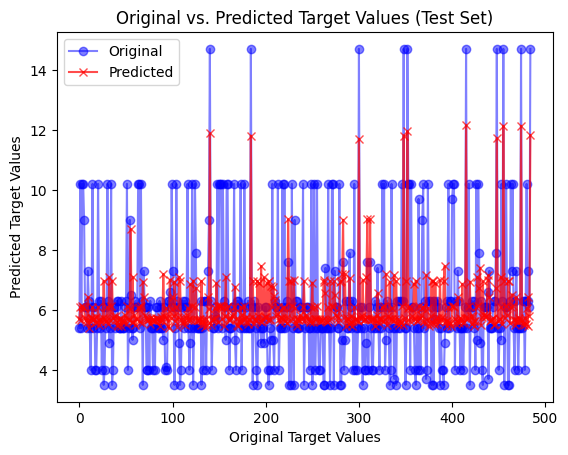

In [758]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


residuals = abs((y_test - predictions)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean*100)
print("Standard Deviation of Residuals:", residual_std)

# Plot the original vs. predicted values for the test set
plt.plot(y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.plot(predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


### <a id='toc1_2_12_'></a>[SVR (Support Vector Regression)](#toc0_)

In [759]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [760]:
# Standardize the features (optional but can improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.14463320546104297
Mean Squared Error (MSE): 4.328811400968876


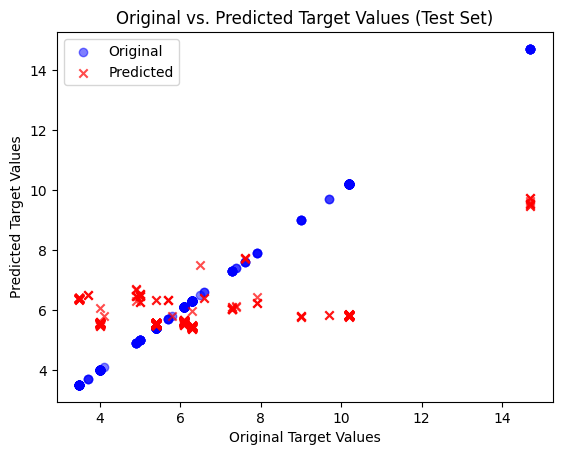

In [761]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_13_'></a>[Random Forest Regression:](#toc0_)

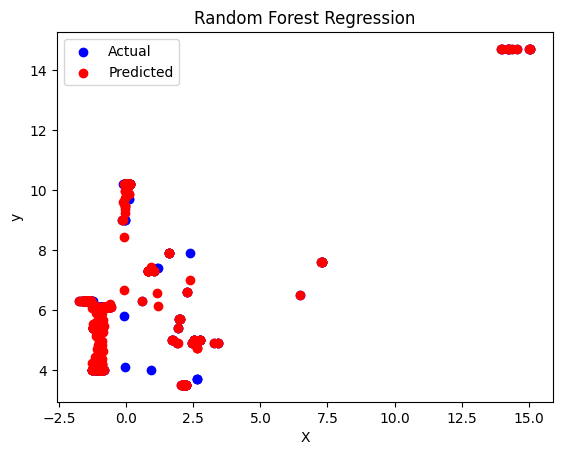

In [762]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
# We'll use 10 decision trees in the ensemble
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

Mean Squared Error: 0.3506583505154639
Root Squared Error: 0.9307104233758954
Mean Absolute Error: 0.23037113402062112
Mean of Residuals / Accouracy : 95.40486831811681


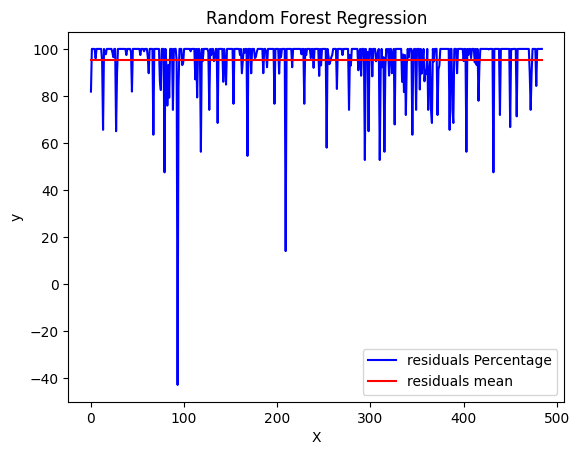

In [763]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
print("Root Squared Error:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


accuracy = pd.DataFrame();
accuracy['test'] = y_test
accuracy['prediction'] = y_pred

residuals = 100 - abs((y_test - y_pred) * 100/ y_test)
accuracy['residuals_pct'] = residuals


residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

accuracy['residuals_mean'] = residual_mean
print("Mean of Residuals / Accouracy :", residual_mean)

# Plot the results
plt.plot(accuracy.index, accuracy['residuals_pct'], color='blue', label='residuals Percentage')
plt.plot(accuracy.index, accuracy['residuals_mean'], color='red', label='residuals mean')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()


### <a id='toc1_2_14_'></a>[Confusion Matrix](#toc0_)